In [1]:
import pandas as pd


In [56]:
df = pd.read_csv('Amount.csv', low_memory=False)

In [57]:
df.head()

,Amount,index,Order ID,Date,Month,Status,Fulfilment,Sales Channel,ship-service-level,Style,...,Qty,currency,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,647.62,0,405-8078784-5731545,30/04/22,April,Cancelled,Merchant,Amazon.in,Standard,SET389,...,0,INR,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,406.00,1,171-9198151-1101146,30/04/22,April,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,...,1,INR,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,329.00,2,404-0687676-7273146,30/04/22,April,Shipped,Amazon,Amazon.in,Expedited,JNE3371,...,1,INR,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,753.33,3,403-9615377-8133951,30/04/22,April,Cancelled,Merchant,Amazon.in,Standard,J0341,...,0,INR,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,574.00,4,407-1069790-7240320,30/04/22,April,Shipped,Amazon,Amazon.in,Expedited,JNE3671,...,1,INR,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [58]:
df.isnull().sum()

Amount                 5261
index                     0
Order ID                  0
Date                      0
Month                     0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         4793
Qty                       0
currency               5261
ship-city                21
ship-state               21
ship-postal-code         21
ship-country             21
promotion-ids         32952
B2B                       0
fulfilled-by          59971
Unnamed: 22           34564
dtype: int64

# Data Cleaning


 ## Changes Made to Data

Columns to drop()
Unnamed: 22 - undeterminable data
fulfilled-by - only value was amazon courier "easy-ship" with no other relationship

Columns dropduplicates()
Order and ASIN - have 7 duplicated values based on order # and product # (ASIN)
Columns fillna()
Courier Status - will fill missing with 'Unknown'
promotion-ids - will fill missing with 'No Promotion'
Amount - will fill missing with 0, since 97% of of all Orders with missing Amount are cancelled

Column Renaming and changing values
B2B - changing to customer_type and changing the values to business and customer
Amount - changing to order_amount and converting from INR to €

size - created an ordered category of based on product sizes

### Dropping Column

In [59]:
df.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

### Dropping Duplicates

In [60]:
df[df.duplicated(['Order ID','ASIN'], keep=False)]

,Amount,Order ID,Date,Month,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
31692,NaN,408-0373839-4433120,04/05/22,May,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,BENGALURU,KARNATAKA,560072.0,NaN,False
31693,NaN,408-0373839-4433120,04/05/22,May,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,BENGALURU,KARNATAKA,560072.0,NaN,False
37844,NaN,407-8364731-6449117,29/05/22,May,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
37847,487.0,407-8364731-6449117,29/05/22,May,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
70808,1163.0,407-4853873-4978725,22/06/22,June,Shipped,Amazon,Expedited,J0230,J0230-SKD-M,Set,M,B08XNJG8B1,Shipped,1,Zirakpur,Punjab,140603.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
70809,1163.0,407-4853873-4978725,22/06/22,June,Shipped,Amazon,Expedited,J0230,J0230-SKD-M,Set,M,B08XNJG8B1,Shipped,1,Zirakpur,Punjab,140603.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


### Filling NaN Values

In [61]:
df['Courier Status'].fillna('unknown',inplace=True)

In [62]:
df['promotion-ids'].fillna('no promotion',inplace=True)

In [63]:
df['Amount'].fillna(0,inplace=True)

In [64]:
df['ship-city'].fillna('unknown', inplace = True)
df['ship-state'].fillna('unknown', inplace = True)
df['ship-postal-code'].fillna('unknown', inplace = True)

### Renaming Columns

In [73]:
mapper = {'Order ID':'order_ID', 'Date':'date', 'Status':'ship_status','Fulfilment':'fullfilment',
          'ship-service-level':'service_level', 'Style':'style', 'SKU':'sku', 'Category':'product_category', 
          'Size':'size', 'ASIN':'asin', 'Courier Status':'courier_ship_status', 'Qty':'order_quantity', 
          'Amount':'order_amount_($)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 
          'promotion-ids':'promotion','B2B':'customer_type'}

In [74]:
df.rename(columns=mapper, inplace =True)

  ### Convert Amount Column values to Euro 

In [77]:

exchange_rate = 0.011
df['order_amount_($)'] = df['order_amount_($)'].apply(lambda x: x * exchange_rate)

### Convert B2B Column type

In [79]:
df['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

### Define the desired order of months

In [80]:
month_order = ['April', 'May', 'June']

In [81]:
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

In [85]:
import missingno

<AxesSubplot:>

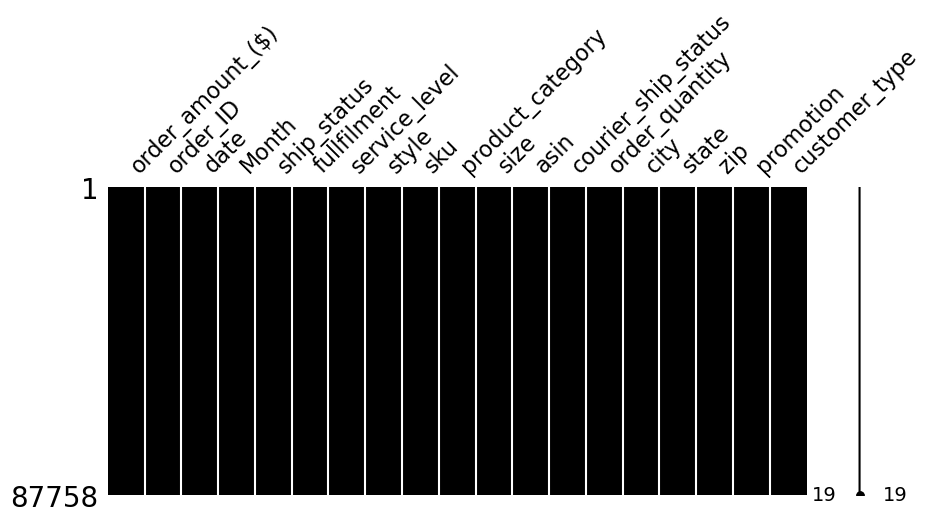

In [86]:
import missingno as mn
mn.matrix(df,color=(0,0,0),figsize = (10,4))

### No Missing values found in our dataset

In [83]:
df_copy = df.copy()

### Saved Clean Data

In [84]:
df_copy.to_csv('my_dataset_copy.csv', index=False)

In [308]:
df = pd.read_csv('CleanedDataset.csv', low_memory=False)

### EDA Analysis on Clean Data

In [89]:
import seaborn as sns
import numpy as np

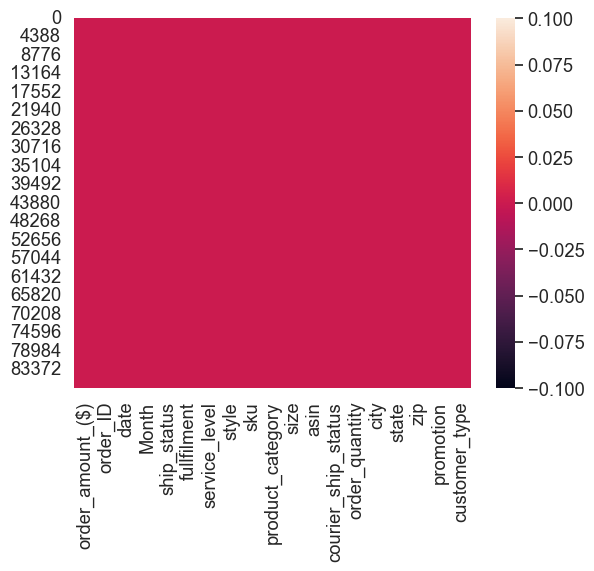

In [309]:
sns.heatmap(df.isnull())
plt.show()

### State wise Value Count


In [88]:
df['state'].value_counts()

MAHARASHTRA          15088
KARNATAKA            11755
TELANGANA             7845
TAMIL NADU            7754
UTTAR PRADESH         7154
                     ...  
Arunachal pradesh        1
Mizoram                  1
rajsthan                 1
LAKSHADWEEP              1
Rajsthan                 1
Name: state, Length: 65, dtype: int64

### Mahrashtra and Rajsthan are the Max and min in frequency of order

In [311]:
df['product_category'].value_counts()

Set              34064
kurta            33874
Western Dress    10669
Top               7289
Ethnic Dress       769
Blouse             635
Bottom             340
Saree              115
Dupatta              3
Name: product_category, dtype: int64

In [101]:
revenue_by_product = df.groupby('product_category')['order_amount_($)'].sum()
percent_revenue_by_product = ((revenue_by_product / revenue_by_product.sum()) * 100).sort_values(ascending=False)
percent_revenue_by_product = percent_revenue_by_product.apply(lambda x: "{:.2f}%".format(x))

In [105]:
print("Percentage of revenue by product category:")
print(percent_revenue_by_product)


Percentage of revenue by product category:
product_category
Set              49.73%
kurta            27.07%
Western Dress    14.40%
Top               6.83%
Ethnic Dress      1.00%
Blouse            0.57%
Bottom            0.22%
Saree             0.16%
Dupatta           0.00%
Name: order_amount_($), dtype: object


### Set has the highest revenue among other products

In [312]:
df.groupby('Month')['order_amount_($)'].sum()

Month
April    225501.04500
June     167886.50868
May      196041.90452
Name: order_amount_($), dtype: float64

### April records the highest revenue generation

In [316]:
# Group the data by product category and calculate the total sales
df.groupby('product_category')['order_amount_($)'].sum()

product_category
Blouse             3383.14482
Bottom             1300.83822
Dupatta              10.06500
Ethnic Dress       5895.27323
Saree               970.55464
Set              293135.48099
Top               40281.73490
Western Dress     84905.35174
kurta            159547.01466
Name: order_amount_($), dtype: float64

### Revenue in Euro 


Text(0.5, 1.0, 'Product Category Frequency')

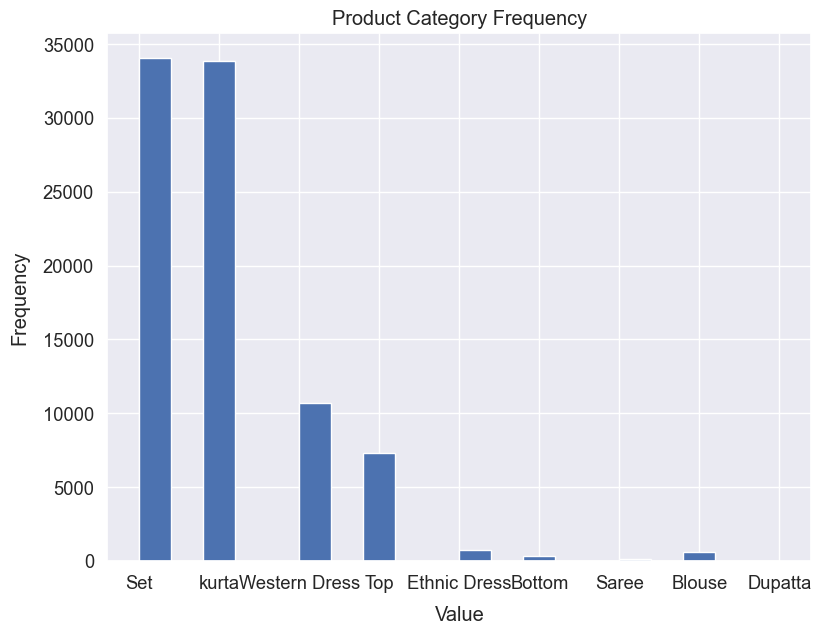

In [313]:
import matplotlib.pyplot as plt
import numpy as np
df['product_category'].hist(bins=20)
plt.subplots_adjust(left=-0.1, bottom=-0.1, right=1, top=1)
plt.xlabel('Value', labelpad=10)
plt.ylabel('Frequency', labelpad=10)
plt.xticks(np.arange(0, 9, step=1))
plt.title('Product Category Frequency')

## Among all the Product category SET has the max sale 

In [108]:
df['customer_type'].value_counts()

customer    87136
business      622
Name: customer_type, dtype: int64

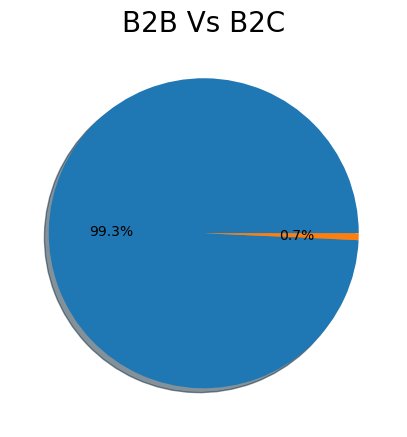

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 7))
plt.pie(df["customer_type"].value_counts(), autopct="%1.1f%%", shadow=True)
plt.title('B2B Vs B2C'.title(), fontsize=20)
plt.ylabel("")
plt.show()

### Only 0.7% of orders are from Business 

## Create a KDE plot for the order amount column

<AxesSubplot:ylabel='Density'>

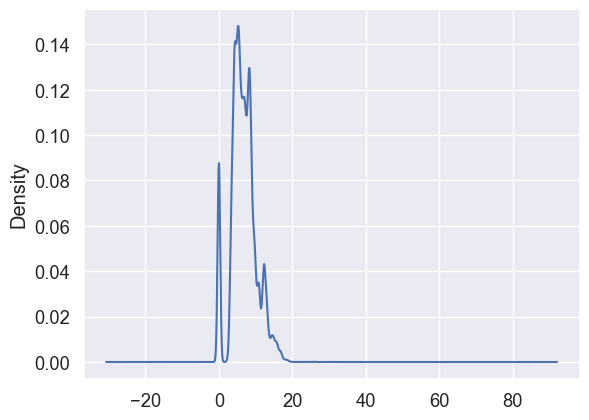

In [314]:
#KDE plot to visualize the distribution of order amounts in the 'order_amount_($)' column of the DataFrame
df['order_amount_($)'].plot(kind='kde')

## KDE plot for order amount

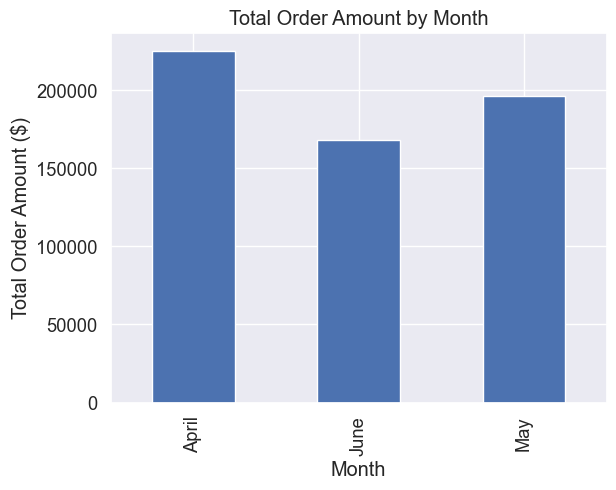

In [315]:
import pandas as pd
import matplotlib.pyplot as plt

# create a DataFrame from the grouped sum
df_grouped = pd.DataFrame(df.groupby('Month')['order_amount_($)'].sum())

# plot the grouped sum as a bar chart
df_grouped.plot(kind='bar', legend=False)

# set the title and axis labels
plt.title('Total Order Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Order Amount ($)')

# show the plot
plt.show()

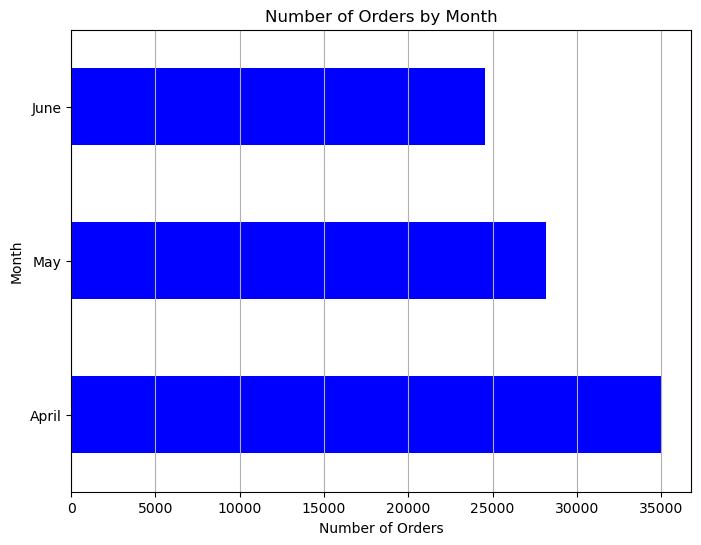

In [107]:
plt.figure(figsize=(8,6))
df.groupby('Month')['order_amount_($)'].count().plot(kind='barh', color='blue')
plt.title('Number of Orders by Month')
plt.xlabel('Number of Orders')
plt.ylabel('Month')
plt.grid(axis='x')
plt.tick_params(axis='y', rotation=0)
plt.show()

### April Records Highest Sale Compare to June and May

<AxesSubplot:ylabel='Density'>

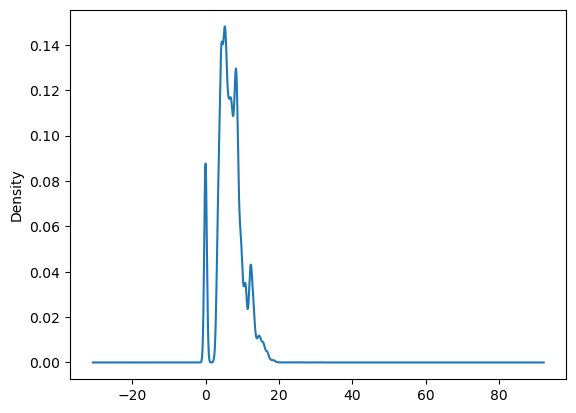

In [113]:
df['order_amount_($)'].plot(kind='kde')

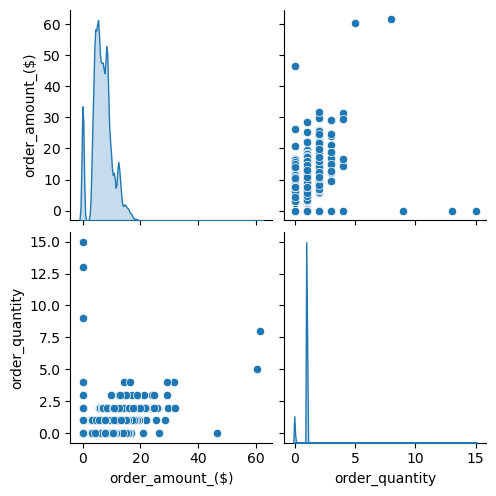

In [114]:
sns.pairplot(df, diag_kind = 'kde')

# Top Product Revenue By Month. Lets try to create interestingvisuals out of it

In [117]:
# Filter the data to only include the four product categories of interest
sales_data = df[df['product_category'].isin(['Western Dress', 'Top', 'kurta', 'Set'])]
sales_by_month = sales_data.groupby(['Month', 'product_category'])['order_amount_($)'].sum().reset_index()

In [118]:
sales_by_month['Month'] = pd.Categorical(sales_by_month['Month'], categories=month_order, ordered=True)

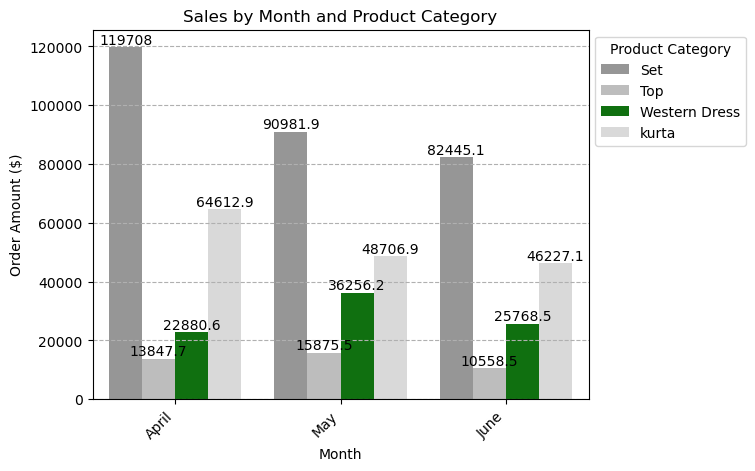

In [121]:
ax = sns.barplot(x='Month', y='order_amount_($)', hue='product_category', data=sales_by_month,
                 palette=['#969696', '#bdbdbd', 'green', '#d9d9d9'])

ax.set_title('Sales by Month and Product Category')
ax.set_xlabel('Month')
ax.set_ylabel('Order Amount ($)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.grid(axis='y', linestyle='--')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')

ax.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')

## 58% Rise in Western Dress from April To May and 12% overall rise from April to June


# TOP Sales By Product Size. Lets Create one Visual out of it.

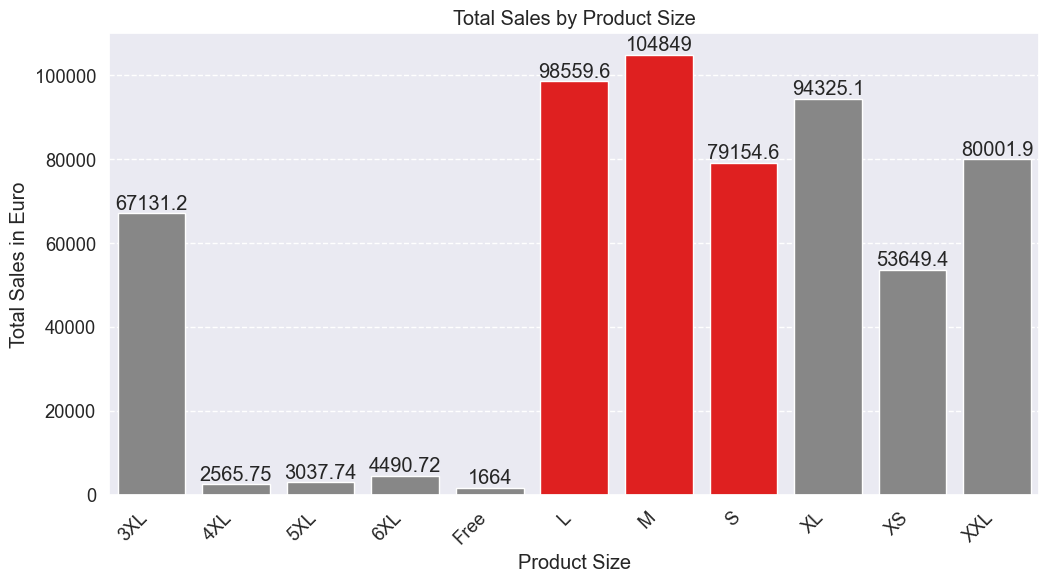

In [129]:
# Group the data by product size and calculate the total sales
sale_by_size = df.groupby('size')['order_amount_($)'].sum()

# Create a horizontal bar chart to show the sales by product size
fig, ax = plt.subplots(figsize=(12,6))
palette_colors = ['red' if size in ['S', 'M', 'L'] else '#878787' for size in sale_by_size.index]
sns.barplot(x=sale_by_size.index, y=sale_by_size.values, ax=ax, palette=palette_colors)

# Add title and axis labels
ax.set(title='Total Sales by Product Size', xlabel='Product Size', ylabel='Total Sales in Euro')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Increase font size
sns.set(font_scale=1.2)

# Add horizontal grid
ax.grid(axis='y', linestyle='--')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')




NameError: name 'western_sales' is not defined

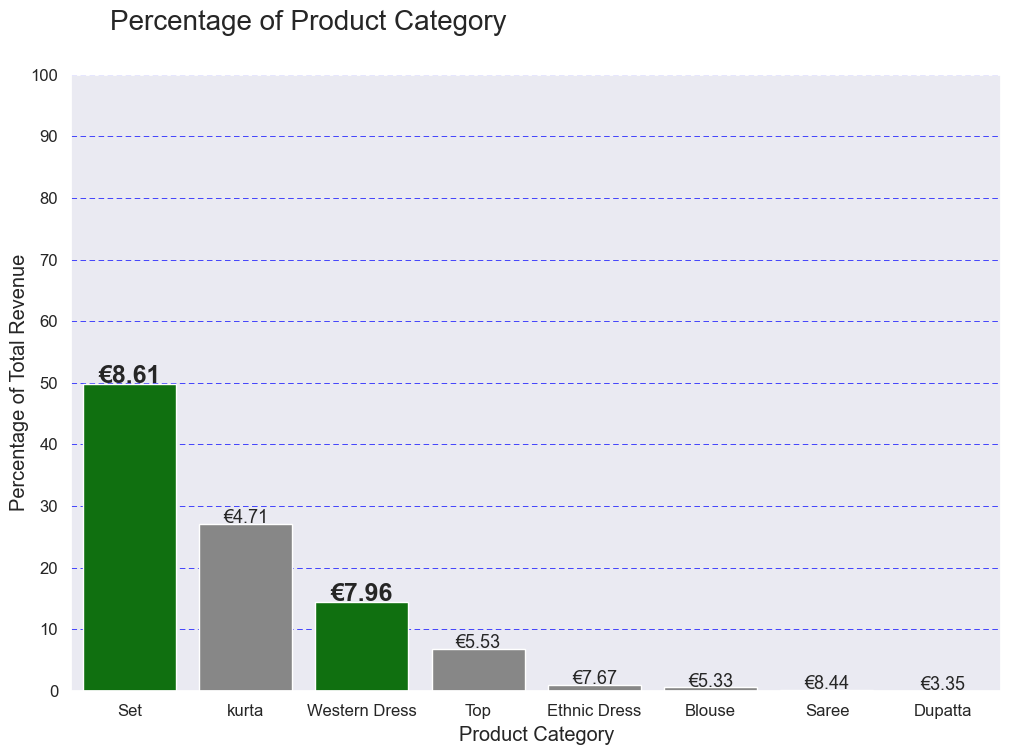

In [317]:
# Group the data by product category and calculate the total sales
sales_by_category = df.loc[df['product_category'].isin(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Blouse', 'Dupatta', 'Saree'])].groupby('product_category')['order_amount_($)'].sum()

# Calculate the total revenue
total_revenue = sales_by_category.sum()

# Calculate the percentage of total revenue for each category
sales_by_category_pct = (sales_by_category / total_revenue) * 100

# Sort the categories by total sales
sales_by_category_pct = sales_by_category_pct.sort_values(ascending=False)

# Create a bar chart to show the sales by product category
fig, ax = plt.subplots(figsize=(12,8))
palette_colors = ['Green' if cat in ['Set', 'Western Dress'] else '#878787' for cat in sales_by_category_pct.index]
sns.barplot(x=sales_by_category_pct.index, y=sales_by_category_pct.values, ax=ax, palette=palette_colors)

# Set font sizes for x and y labels, title, and ticks
# Set the number of y ticks you want
num_y_ticks = 10

# Calculate the y tick values
y_tick_values = list(range(0,101,10))
# Set the y ticks
ax.set_yticks(y_tick_values)

ax.set_ylabel('Percentage of Total Revenue', labelpad=1)
ax.set_ylim(0, 100)
ax.set_xlabel('Product Category', labelpad=5)
ax.set_title('Percentage of Product Category', fontsize=20, x=0.255, y=1.05, pad=10)
ax.tick_params(axis='both', labelsize=12)

#ax.set_yticklabels(list(range(0,101,10)))
ax.yaxis.grid(linestyle='--', color='blue', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)

# Set font sizes for the bars and add annotations for Set, kurta, and Western Dress
for i, category in enumerate(sales_by_category_pct.index):
    avg_cost = df[df['product_category'] == category]['order_amount_($)'].mean()
    if category in ['Set', 'Western Dress']:
        ax.text(i, sales_by_category_pct.values[i] +.1, f'€{avg_cost:.2f}', ha='center', fontsize=18, fontweight='bold')
    else:
        ax.text(i, sales_by_category_pct.values[i] +.1, f'€{avg_cost:.2f}', ha='center', fontsize=13)


# Calculate the percentage of revenue from western dresses
western_pct = (western_sales / total_revenue) * 100

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()
fig.savefig('Percent_Prod_Revenuw.png', dpi=300)

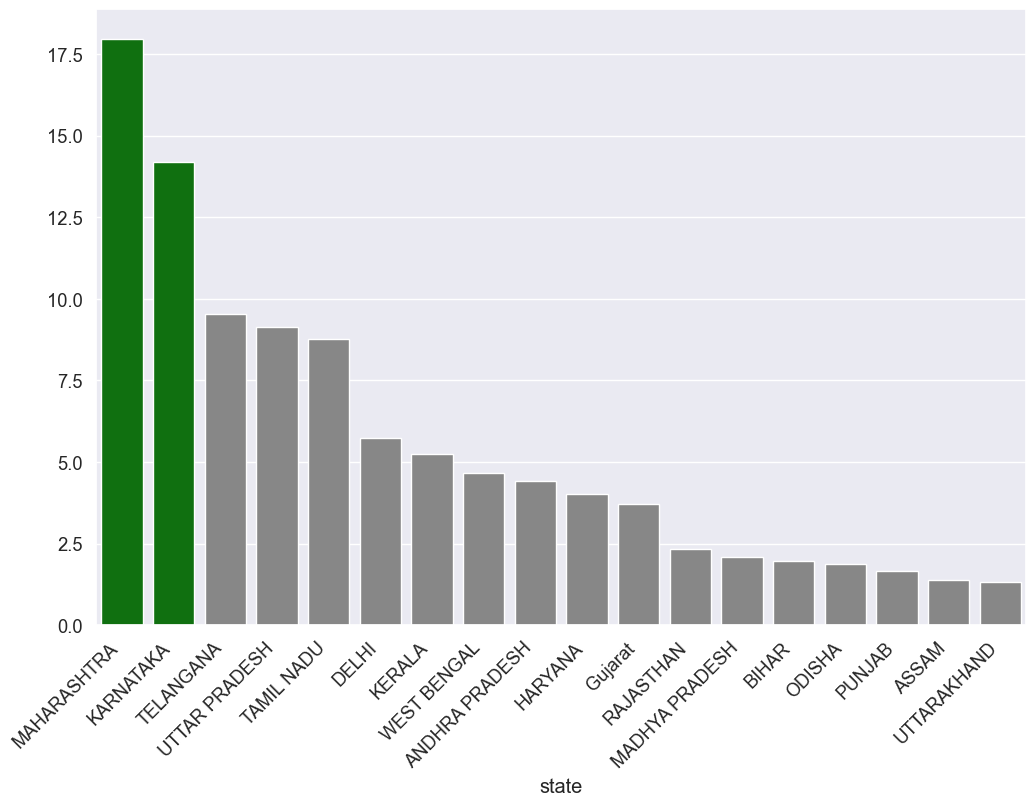

In [318]:
# Group the data by States category and calculate the total sales
sales_by_state = df.groupby('state')['order_amount_($)'].sum()

# Filter the categories to include
included_categories_state = ['MAHARASHTRA', 'KARNATAKA', 'TELANGANA', 'UTTAR PRADESH', 'TAMIL NADU', 'DELHI', 'KERALA', 'WEST BENGAL', 'ANDHRA PRADESH', 'HARYANA', 'Gujarat', 'RAJASTHAN', 'MADHYA PRADESH', 'BIHAR', 'ODISHA', 'PUNJAB', 'ASSAM', 'UTTARAKHAND']
sales_by_state = sales_by_state.loc[included_categories_state]

# Calculate the total Sales
total_revenue_state = sales_by_state.sum()

# Calculate the percentage of total revenue for each category
sales_by_category_state = (sales_by_state / total_revenue_state) * 100

# Sort the categories by total sales
sales_by_category_state = sales_by_category_state.sort_values(ascending=False)

# Create a bar chart to show the sales by State
fig, ax = plt.subplots(figsize=(12,8))
palette_colors = ['green' if cat in ['MAHARASHTRA', 'KARNATAKA'] else '#878787' for cat in sales_by_category_state.index]
sns.barplot(x=sales_by_category_state.index, y=sales_by_category_state.values, ax=ax, palette=palette_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [319]:
!pip install pandas
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 6.7 MB/s eta 0:00:00


In [320]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [130]:
pip install ptitprince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.


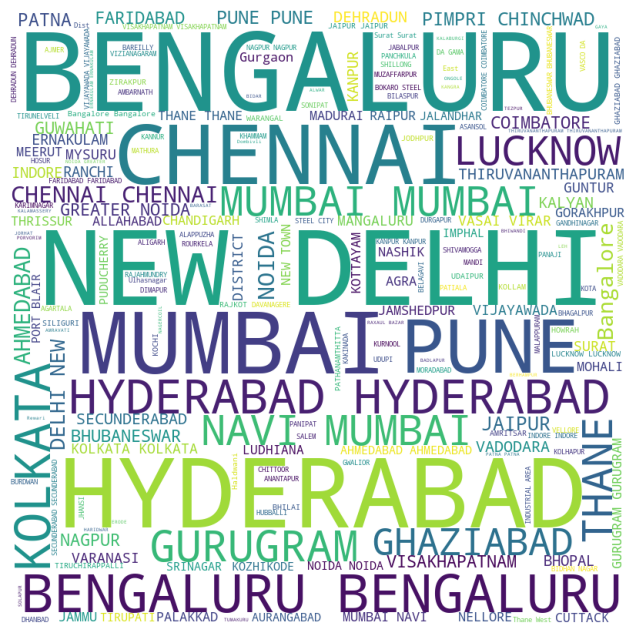

In [321]:
# Concatenate all the city names in the "city" column into a single string
text = ' '.join(city for city in df['city'])

# Create a WordCloud object with the desired specifications
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the word cloud using matplotlib
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [131]:
import ptitprince

<AxesSubplot:xlabel='order_amount_($)', ylabel='courier_ship_status'>

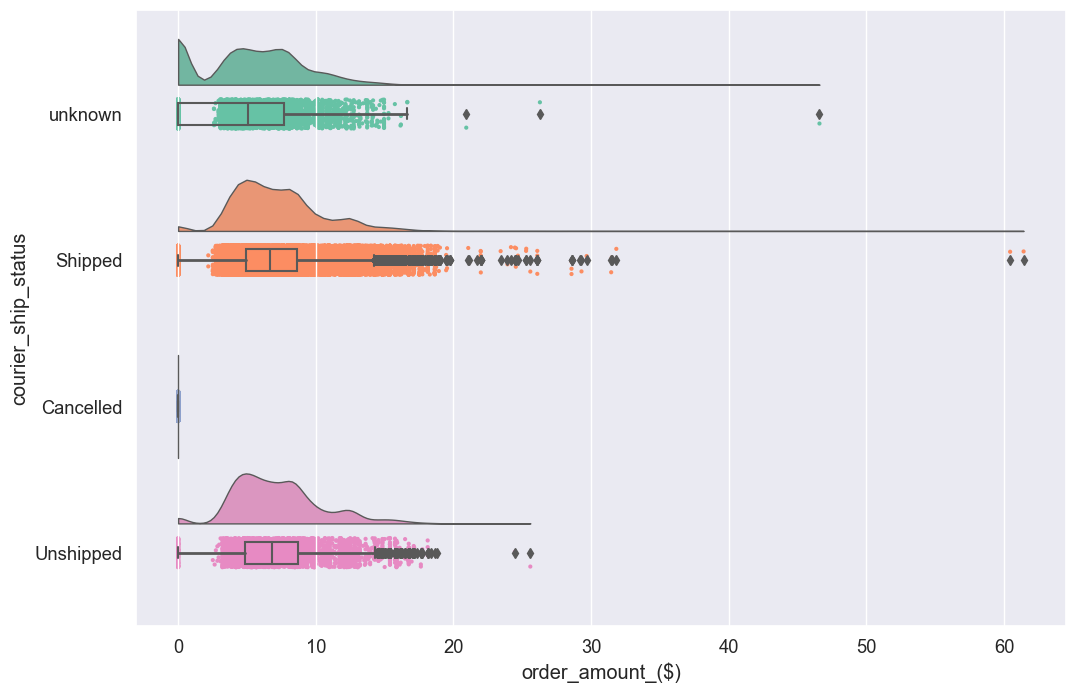

In [135]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'courier_ship_status', y = 'order_amount_($)', orient = 'h')
ax.set(title='Total Sales by Product Size', xlabel='Product Size', ylabel='Total Sales in Euro')

In [137]:
df_Final= df.copy()

# Feature Engineering

## One Hot encoding categorical columns 


In [139]:
categorical_features = [features for features in df_Final.columns if df_Final[features].dtype=='O']
categorical_features

['order_ID',
 'date',
 'ship_status',
 'fullfilment',
 'service_level',
 'style',
 'sku',
 'product_category',
 'size',
 'asin',
 'courier_ship_status',
 'city',
 'state',
 'zip',
 'promotion',
 'customer_type']

In [187]:
df_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87758 entries, 0 to 87757
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_amount_($)  87758 non-null  float64
 1   order_ID          87758 non-null  object 
 2   date              87758 non-null  object 
 3   Month             87758 non-null  object 
 4   ship_status       87758 non-null  object 
 5   fullfilment       87758 non-null  int64  
 6   service_level     87758 non-null  int64  
 7   style             87758 non-null  object 
 8   sku               87758 non-null  object 
 9   product_category  87758 non-null  object 
 10  size              87758 non-null  object 
 11  asin              87758 non-null  object 
 12  order_quantity    87758 non-null  int64  
 13  city              87758 non-null  object 
 14  state             87758 non-null  object 
 15  zip               87758 non-null  object 
 16  promotion         87758 non-null  object

In [226]:
df_Final = pd.read_csv('CleanedDataset.csv', low_memory=False)

In [227]:
df_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87758 entries, 0 to 87757
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_amount_($)     87758 non-null  float64
 1   order_ID             87758 non-null  object 
 2   date                 87758 non-null  object 
 3   Month                87758 non-null  object 
 4   ship_status          87758 non-null  object 
 5   fullfilment          87758 non-null  object 
 6   service_level        87758 non-null  object 
 7   style                87758 non-null  object 
 8   sku                  87758 non-null  object 
 9   product_category     87758 non-null  object 
 10  size                 87758 non-null  object 
 11  asin                 87758 non-null  object 
 12  courier_ship_status  87758 non-null  object 
 13  order_quantity       87758 non-null  int64  
 14  city                 87758 non-null  object 
 15  state                87758 non-null 

In [228]:
df_Final['customer_type'].value_counts()

customer    87136
business      622
Name: customer_type, dtype: int64

In [229]:
df_Final.head()

,order_amount_($),order_ID,date,Month,ship_status,fullfilment,service_level,style,sku,product_category,size,asin,courier_ship_status,order_quantity,city,state,zip,promotion,customer_type
0,7.12382,405-8078784-5731545,30/04/22,April,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,MUMBAI,MAHARASHTRA,400081,no promotion,customer
1,4.46600,171-9198151-1101146,30/04/22,April,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,BENGALURU,KARNATAKA,560085,Amazon PLCC Free-Financing Universal Merchant ...,customer
2,3.61900,404-0687676-7273146,30/04/22,April,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,NAVI MUMBAI,MAHARASHTRA,410210,IN Core Free Shipping 2015/04/08 23-48-5-108,business
3,8.28663,403-9615377-8133951,30/04/22,April,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,PUDUCHERRY,PUDUCHERRY,605008,no promotion,customer
4,6.31400,407-1069790-7240320,30/04/22,April,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,CHENNAI,TAMIL NADU,600073,no promotion,customer


In [230]:
df_Final['customer_type']= np.where(df_Final['customer_type']=='customer',0,1)

In [231]:
df_Final['customer_type'].value_counts()

0    87136
1      622
Name: customer_type, dtype: int64

In [232]:
df_Final.head()

,order_amount_($),order_ID,date,Month,ship_status,fullfilment,service_level,style,sku,product_category,size,asin,courier_ship_status,order_quantity,city,state,zip,promotion,customer_type
0,7.12382,405-8078784-5731545,30/04/22,April,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,MUMBAI,MAHARASHTRA,400081,no promotion,0
1,4.46600,171-9198151-1101146,30/04/22,April,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,BENGALURU,KARNATAKA,560085,Amazon PLCC Free-Financing Universal Merchant ...,0
2,3.61900,404-0687676-7273146,30/04/22,April,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,NAVI MUMBAI,MAHARASHTRA,410210,IN Core Free Shipping 2015/04/08 23-48-5-108,1
3,8.28663,403-9615377-8133951,30/04/22,April,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,PUDUCHERRY,PUDUCHERRY,605008,no promotion,0
4,6.31400,407-1069790-7240320,30/04/22,April,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,CHENNAI,TAMIL NADU,600073,no promotion,0


In [233]:
df_Final['service_level'].value_counts()

Expedited    59256
Standard     28502
Name: service_level, dtype: int64

In [234]:
df_Final['service_level']= np.where(df_Final['service_level']=='Expedited',0,1)

In [235]:
df_Final['service_level'].value_counts()

0    59256
1    28502
Name: service_level, dtype: int64

In [236]:
df_Final['fullfilment'].value_counts()

Amazon      59971
Merchant    27787
Name: fullfilment, dtype: int64

In [237]:
df_Final['fullfilment']= np.where(df_Final['fullfilment']=='Amazon',0,1)

In [238]:
df_Final['fullfilment'].value_counts()

0    59971
1    27787
Name: fullfilment, dtype: int64

In [239]:
df_Final['courier_ship_status'].value_counts()

Shipped      74357
unknown       4793
Unshipped     4660
Cancelled     3948
Name: courier_ship_status, dtype: int64

In [240]:
df_Final.head()

,order_amount_($),order_ID,date,Month,ship_status,fullfilment,service_level,style,sku,product_category,size,asin,courier_ship_status,order_quantity,city,state,zip,promotion,customer_type
0,7.12382,405-8078784-5731545,30/04/22,April,Cancelled,1,1,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,MUMBAI,MAHARASHTRA,400081,no promotion,0
1,4.46600,171-9198151-1101146,30/04/22,April,Shipped - Delivered to Buyer,1,1,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,BENGALURU,KARNATAKA,560085,Amazon PLCC Free-Financing Universal Merchant ...,0
2,3.61900,404-0687676-7273146,30/04/22,April,Shipped,0,0,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,NAVI MUMBAI,MAHARASHTRA,410210,IN Core Free Shipping 2015/04/08 23-48-5-108,1
3,8.28663,403-9615377-8133951,30/04/22,April,Cancelled,1,1,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,PUDUCHERRY,PUDUCHERRY,605008,no promotion,0
4,6.31400,407-1069790-7240320,30/04/22,April,Shipped,0,0,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,CHENNAI,TAMIL NADU,600073,no promotion,0


In [241]:
df_Final['courier_ship_status_shipped_flag']= np.where(df_Final['courier_ship_status']=='Shipped',1,0)
df_Final['courier_ship_status_unknown_flag']= np.where(df_Final['courier_ship_status']=='unknown',1,0)
df_Final['courier_ship_status_Unshipped_flag']= np.where(df_Final['courier_ship_status']=='Unshipped',1,0)
df_Final['courier_ship_status_Cancelled_flag']= np.where(df_Final['courier_ship_status']=='Cancelled',1,0)

In [242]:
df_Final.head()

,order_amount_($),order_ID,date,Month,ship_status,fullfilment,service_level,style,sku,product_category,...,order_quantity,city,state,zip,promotion,customer_type,courier_ship_status_shipped_flag,courier_ship_status_unknown_flag,courier_ship_status_Unshipped_flag,courier_ship_status_Cancelled_flag
0,7.12382,405-8078784-5731545,30/04/22,April,Cancelled,1,1,SET389,SET389-KR-NP-S,Set,...,0,MUMBAI,MAHARASHTRA,400081,no promotion,0,0,1,0,0
1,4.46600,171-9198151-1101146,30/04/22,April,Shipped - Delivered to Buyer,1,1,JNE3781,JNE3781-KR-XXXL,kurta,...,1,BENGALURU,KARNATAKA,560085,Amazon PLCC Free-Financing Universal Merchant ...,0,1,0,0,0
2,3.61900,404-0687676-7273146,30/04/22,April,Shipped,0,0,JNE3371,JNE3371-KR-XL,kurta,...,1,NAVI MUMBAI,MAHARASHTRA,410210,IN Core Free Shipping 2015/04/08 23-48-5-108,1,1,0,0,0
3,8.28663,403-9615377-8133951,30/04/22,April,Cancelled,1,1,J0341,J0341-DR-L,Western Dress,...,0,PUDUCHERRY,PUDUCHERRY,605008,no promotion,0,0,1,0,0
4,6.31400,407-1069790-7240320,30/04/22,April,Shipped,0,0,JNE3671,JNE3671-TU-XXXL,Top,...,1,CHENNAI,TAMIL NADU,600073,no promotion,0,1,0,0,0


In [243]:
df_Final['courier_ship_status_shipped_flag'].value_counts()

1    74357
0    13401
Name: courier_ship_status_shipped_flag, dtype: int64

In [244]:
df_Final['courier_ship_status_unknown_flag'].value_counts()

0    82965
1     4793
Name: courier_ship_status_unknown_flag, dtype: int64

In [245]:
df_Final['courier_ship_status_Unshipped_flag'].value_counts()

0    83098
1     4660
Name: courier_ship_status_Unshipped_flag, dtype: int64

In [246]:
df_Final['courier_ship_status_Cancelled_flag'].value_counts()

0    83810
1     3948
Name: courier_ship_status_Cancelled_flag, dtype: int64

In [247]:
df_Final.drop(columns= ['courier_ship_status'], inplace = True)

In [248]:
df_Final.head()

,order_amount_($),order_ID,date,Month,ship_status,fullfilment,service_level,style,sku,product_category,...,order_quantity,city,state,zip,promotion,customer_type,courier_ship_status_shipped_flag,courier_ship_status_unknown_flag,courier_ship_status_Unshipped_flag,courier_ship_status_Cancelled_flag
0,7.12382,405-8078784-5731545,30/04/22,April,Cancelled,1,1,SET389,SET389-KR-NP-S,Set,...,0,MUMBAI,MAHARASHTRA,400081,no promotion,0,0,1,0,0
1,4.46600,171-9198151-1101146,30/04/22,April,Shipped - Delivered to Buyer,1,1,JNE3781,JNE3781-KR-XXXL,kurta,...,1,BENGALURU,KARNATAKA,560085,Amazon PLCC Free-Financing Universal Merchant ...,0,1,0,0,0
2,3.61900,404-0687676-7273146,30/04/22,April,Shipped,0,0,JNE3371,JNE3371-KR-XL,kurta,...,1,NAVI MUMBAI,MAHARASHTRA,410210,IN Core Free Shipping 2015/04/08 23-48-5-108,1,1,0,0,0
3,8.28663,403-9615377-8133951,30/04/22,April,Cancelled,1,1,J0341,J0341-DR-L,Western Dress,...,0,PUDUCHERRY,PUDUCHERRY,605008,no promotion,0,0,1,0,0
4,6.31400,407-1069790-7240320,30/04/22,April,Shipped,0,0,JNE3671,JNE3671-TU-XXXL,Top,...,1,CHENNAI,TAMIL NADU,600073,no promotion,0,1,0,0,0


In [249]:
df_Final.drop(columns= ['order_ID','date','style','sku','asin','city','promotion'], inplace = True)

In [250]:
df_Final.head()

,order_amount_($),Month,ship_status,fullfilment,service_level,product_category,size,order_quantity,state,zip,customer_type,courier_ship_status_shipped_flag,courier_ship_status_unknown_flag,courier_ship_status_Unshipped_flag,courier_ship_status_Cancelled_flag
0,7.12382,April,Cancelled,1,1,Set,S,0,MAHARASHTRA,400081,0,0,1,0,0
1,4.46600,April,Shipped - Delivered to Buyer,1,1,kurta,3XL,1,KARNATAKA,560085,0,1,0,0,0
2,3.61900,April,Shipped,0,0,kurta,XL,1,MAHARASHTRA,410210,1,1,0,0,0
3,8.28663,April,Cancelled,1,1,Western Dress,L,0,PUDUCHERRY,605008,0,0,1,0,0
4,6.31400,April,Shipped,0,0,Top,3XL,1,TAMIL NADU,600073,0,1,0,0,0


In [251]:
df_Final.drop(columns= ['Month'], inplace = True)

In [252]:
df_Final['product_category'].value_counts()

Set              34064
kurta            33874
Western Dress    10669
Top               7289
Ethnic Dress       769
Blouse             635
Bottom             340
Saree              115
Dupatta              3
Name: product_category, dtype: int64

In [253]:
df_Final['product_category_Set_flag']= np.where(df_Final['product_category']=='Set',1,0)
df_Final['product_category_Kurta_flag']= np.where(df_Final['product_category']=='kurta',1,0)
df_Final['product_category_Western_flag']= np.where(df_Final['product_category']=='Western Dress',1,0)
df_Final['product_category_Top_flag']= np.where(df_Final['product_category']=='Top',1,0)
df_Final['product_category_Ethnic_flag']= np.where(df_Final['product_category']=='Ethnic Dress',1,0)
df_Final['product_category_Blouse_flag']= np.where(df_Final['product_category']=='Blouse',1,0)
df_Final['product_category_Bottom_flag']= np.where(df_Final['product_category']=='Bottom',1,0)
df_Final['product_category_Saree_flag']= np.where(df_Final['product_category']=='Saree',1,0)
df_Final['product_category_Dupatta_flag']= np.where(df_Final['product_category']=='Dupatta',1,0)

In [254]:
df_Final.head()

,order_amount_($),ship_status,fullfilment,service_level,product_category,size,order_quantity,state,zip,customer_type,...,courier_ship_status_Cancelled_flag,product_category_Set_flag,product_category_Kurta_flag,product_category_Western_flag,product_category_Top_flag,product_category_Ethnic_flag,product_category_Blouse_flag,product_category_Bottom_flag,product_category_Saree_flag,product_category_Dupatta_flag
0,7.12382,Cancelled,1,1,Set,S,0,MAHARASHTRA,400081,0,...,0,1,0,0,0,0,0,0,0,0
1,4.46600,Shipped - Delivered to Buyer,1,1,kurta,3XL,1,KARNATAKA,560085,0,...,0,0,1,0,0,0,0,0,0,0
2,3.61900,Shipped,0,0,kurta,XL,1,MAHARASHTRA,410210,1,...,0,0,1,0,0,0,0,0,0,0
3,8.28663,Cancelled,1,1,Western Dress,L,0,PUDUCHERRY,605008,0,...,0,0,0,1,0,0,0,0,0,0
4,6.31400,Shipped,0,0,Top,3XL,1,TAMIL NADU,600073,0,...,0,0,0,0,1,0,0,0,0,0


In [255]:
df_Final.drop(columns= ['product_category'], inplace = True)

In [257]:
df_Final['ship_status'].value_counts()

Shipped                          52018
Shipped - Delivered to Buyer     19983
Cancelled                        12319
Shipped - Returned to Seller      1345
Shipped - Picked Up                965
Pending                            655
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      135
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer          8
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: ship_status, dtype: int64

In [258]:
df_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87758 entries, 0 to 87757
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   order_amount_($)                    87758 non-null  float64
 1   ship_status                         87758 non-null  object 
 2   fullfilment                         87758 non-null  int64  
 3   service_level                       87758 non-null  int64  
 4   size                                87758 non-null  object 
 5   order_quantity                      87758 non-null  int64  
 6   state                               87758 non-null  object 
 7   zip                                 87758 non-null  object 
 8   customer_type                       87758 non-null  int64  
 9   courier_ship_status_shipped_flag    87758 non-null  int64  
 10  courier_ship_status_unknown_flag    87758 non-null  int64  
 11  courier_ship_status_Unshipped_flag  87758

In [259]:
df_Final['ship_status'].value_counts()

Shipped                          52018
Shipped - Delivered to Buyer     19983
Cancelled                        12319
Shipped - Returned to Seller      1345
Shipped - Picked Up                965
Pending                            655
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      135
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer          8
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: ship_status, dtype: int64

In [260]:
df_Final['ship_status_Shipped_flag']= np.where(df_Final['ship_status']=='Shipped',1,0)
df_Final['ship_status_ShippedDelivered_flag']= np.where(df_Final['ship_status']=='Shipped - Delivered to Buyer',1,0)
df_Final['ship_status_Cancelled_flag']= np.where(df_Final['ship_status']=='Cancelled',1,0)
df_Final['ship_status_ShippedReturned_flag']= np.where(df_Final['ship_status']=='Shipped - Returned to Seller',1,0)
df_Final['ship_status_Pickedup_flag']= np.where(df_Final['ship_status']=='Shipped - Picked Up',1,0)
df_Final['ship_status_Pending_flag']= np.where(df_Final['ship_status']=='Pending',1,0)
df_Final['ship_status_Waiting_flag']= np.where(df_Final['ship_status']=='Pending - Waiting for Pick Up',1,0)
df_Final['ship_status_Returning_flag']= np.where(df_Final['ship_status']=='Shipped - Returning to Seller',1,0)
df_Final['ship_status_outfordelivery_flag']= np.where(df_Final['ship_status']=='Shipped - Out for Delivery',1,0)
df_Final['ship_status_Rejected_flag']= np.where(df_Final['ship_status']=='Shipped - Rejected by Buyer',1,0)
df_Final['ship_status_Shipping_flag']= np.where(df_Final['ship_status']=='Shipping',1,0)
df_Final['ship_status_Lost_flag']= np.where(df_Final['ship_status']=='Shipped - Lost in Transit ',1,0)
df_Final['ship_status_Damaged_flag']= np.where(df_Final['ship_status']=='Shipped - Damaged',1,0)

In [261]:
df_Final.drop(columns= ['ship_status','zip'], inplace = True)

In [262]:
df_Final['size'].value_counts()

M       15528
L       14910
XL      14420
XXL     12314
S       11484
3XL      9945
XS       7742
6XL       500
5XL       342
4XL       288
Free      285
Name: size, dtype: int64

In [263]:
df_Final['size_M_flag']= np.where(df_Final['size']=='M',1,0)
df_Final['size_L_flag']= np.where(df_Final['size']=='L',1,0)
df_Final['size_XL_flag']= np.where(df_Final['size']=='XL',1,0)
df_Final['size_XXL_flag']= np.where(df_Final['size']=='XXL',1,0)
df_Final['size_S_flag']= np.where(df_Final['size']=='S',1,0)
df_Final['size_3XL_flag']= np.where(df_Final['size']=='3XL',1,0)
df_Final['size_XS_flag']= np.where(df_Final['size']=='XS',1,0)
df_Final['size_6XL_flag']= np.where(df_Final['size']=='6XL',1,0)
df_Final['size_5XL_flag']= np.where(df_Final['size']=='5XL',1,0)
df_Final['size_4XL_flag']= np.where(df_Final['size']=='4XL',1,0)
df_Final['size_Free_flag']= np.where(df_Final['size']=='Free',1,0)


In [264]:
df_Final.drop(columns= ['size','state'], inplace = True)

In [265]:
df_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87758 entries, 0 to 87757
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   order_amount_($)                    87758 non-null  float64
 1   fullfilment                         87758 non-null  int64  
 2   service_level                       87758 non-null  int64  
 3   order_quantity                      87758 non-null  int64  
 4   customer_type                       87758 non-null  int64  
 5   courier_ship_status_shipped_flag    87758 non-null  int64  
 6   courier_ship_status_unknown_flag    87758 non-null  int64  
 7   courier_ship_status_Unshipped_flag  87758 non-null  int64  
 8   courier_ship_status_Cancelled_flag  87758 non-null  int64  
 9   product_category_Set_flag           87758 non-null  int64  
 10  product_category_Kurta_flag         87758 non-null  int64  
 11  product_category_Western_flag       87758

In [325]:
corr_matrix = df_Final.corr()

In [326]:
print(corr_matrix)

                                    order_amount_($)  fullfilment  \
order_amount_($)                            1.000000     0.010387   
fullfilment                                 0.010387     1.000000   
service_level                              -0.021686     0.981474   
order_quantity                              0.383999    -0.157215   
customer_type                               0.016962     0.002936   
courier_ship_status_shipped_flag            0.295506    -0.073130   
courier_ship_status_unknown_flag           -0.114004     0.353107   
courier_ship_status_Unshipped_flag          0.032148    -0.103949   
courier_ship_status_Cancelled_flag         -0.422613    -0.147738   
product_category_Set_flag                   0.436165    -0.014364   
product_category_Kurta_flag                -0.461215    -0.028762   
product_category_Western_flag               0.133908     0.101112   
product_category_Top_flag                  -0.103844    -0.042424   
product_category_Ethnic_flag      

# Feature Selection and Model Building

In [266]:
from sklearn.feature_selection import mutual_info_regression

In [267]:
X= df_Final.drop('order_amount_($)',axis=1)
y = df_Final['order_amount_($)']

In [268]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [269]:
print(selection.feature_importances_)

[4.73130794e-02 8.04361901e-03 3.09105403e-02 1.03711281e-03
 5.16319048e-04 3.72020209e-02 3.65764601e-04 3.23855886e-01
 1.59437109e-02 3.76820871e-01 2.25524891e-04 9.43771763e-02
 5.82062948e-04 7.34583738e-03 9.32294909e-03 5.51944689e-05
 1.41478178e-04 7.59428396e-03 7.39454266e-04 5.04086351e-04
 2.27263641e-04 3.53788550e-04 1.65369564e-04 1.40273925e-04
 2.90250132e-04 1.02234756e-04 1.14962227e-04 1.85637698e-20
 0.00000000e+00 3.21776887e-05 6.52350559e-04 4.47939941e-04
 4.43204541e-04 1.17508617e-03 7.97165133e-04 7.17406117e-04
 1.21035973e-03 1.31522453e-02 8.72948785e-03 7.76517164e-03
 5.86290676e-04]


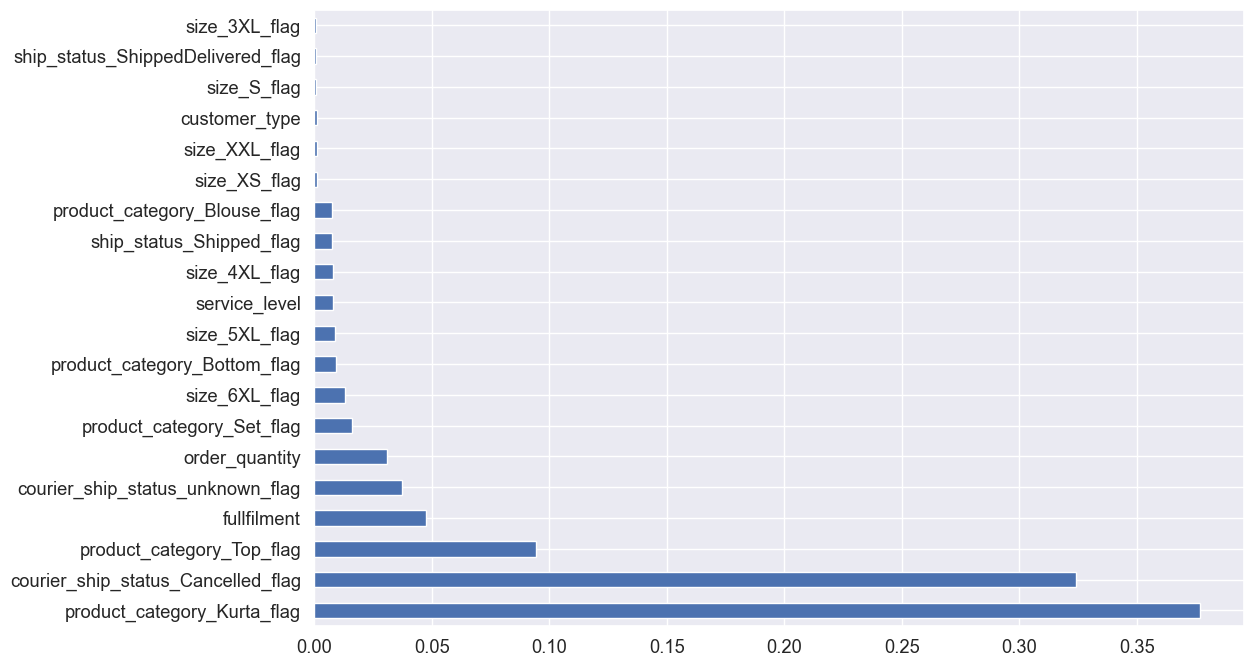

In [270]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# The ML Model suggest that Product category column and courier ship status are the most important feature that should be included in order to predict Amount

##  Train test split

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature Scaling 

## Standardizing data as most ML algorithms except random forest expects numerical columns to be normalized

In [272]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = y_train.values
y_test = y_test.values

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(70206, 41)

(70206,)

(17552, 41)

(17552,)

# Random Forest


In [273]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [274]:
y_pred = reg_rf.predict(X_test)

In [275]:
reg_rf.score(X_train, y_train)

0.566657584488827

In [276]:
reg_rf.score(X_test, y_test)

0.5446190237264212

/Users/shubhangvigya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  kdeplot(a, vertical=vertical, ax=ax, color=kde_color, **kde_kws)


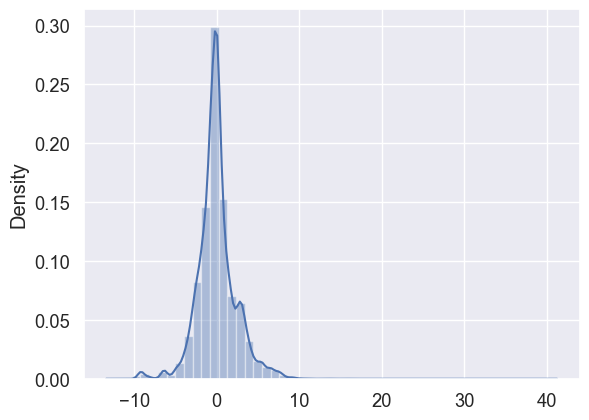

In [277]:
sns.distplot(y_test-y_pred)
plt.show()

# The ytest- ypred follows a normal distribution which means our random forest model predicted y-test well

In [278]:
from sklearn import metrics

In [279]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.6178006178236615
MSE: 5.518556209061316
RMSE: 2.3491607456837253


In [280]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

34.034756772597035

In [281]:
metrics.r2_score(y_test, y_pred)

0.5446190237264212

# The Rsquare value of random forest algorithm is 54%

# XG Boost Algorithm

In [282]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [283]:
from xgboost import XGBRegressor

In [285]:
model_xg = XGBRegressor()

In [286]:
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [287]:
y_pred_xg = model_xg.predict(X_test)

In [288]:
model_xg.score(X_train, y_train)

0.5669756125103256

In [289]:
model_xg.score(X_test, y_test)

0.5462490565960679

/Users/shubhangvigya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  kdeplot(a, vertical=vertical, ax=ax, color=kde_color, **kde_kws)


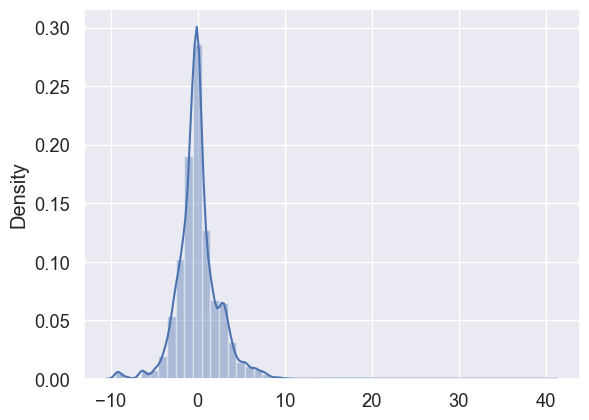

In [290]:
sns.distplot(y_test-y_pred_xg)
plt.show()

In [291]:
metrics.r2_score(y_test, y_pred_xg)

0.5462490565960679

# The r2 value of Xg boost is 54% which is alomst similar to Random forest 